In this practice we will solve multiple systems of differential equations numerically!

In [3]:
#Including all the necessary libraries
from num_sol_plot import *
%matplotlib inline

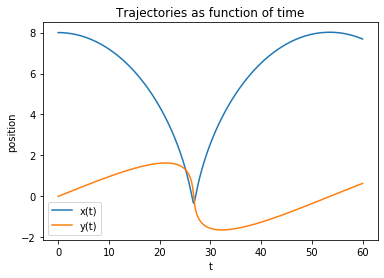

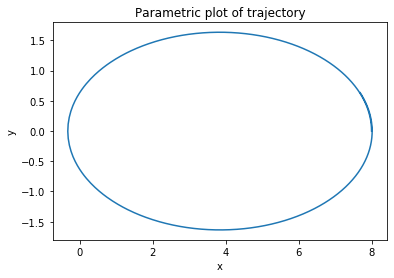

In [4]:
#In this example, we let the force be a central forcee, V = k/r, with k=1.
#We also define the energy, in case we want to see how it evolves with time (due to numerical errors)
def force_fct(t, x, y, vx, vy):
    r = np.sqrt(x*x+y*y)
    r32 = np.power(r, 3.0)
    return [-x/r32, -y/r32, vx, vy]

sol, t = solve_eom(0, 60, 8, 0, 0, 0.1, force_fct)
x1 = sol.sol(t)[2].T
y1 = sol.sol(t)[3].T

plot_trajectory(sol, t)
#plot_velocities(sol, t)
plot_xy_plane(sol, t)
plt.show()

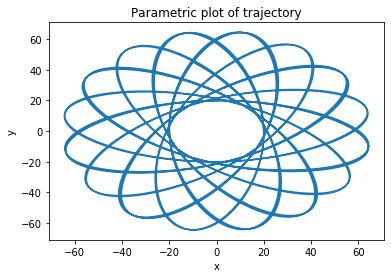

In [5]:
#In this example, we let the force be a central forcee, V = a*r, with k=1, as in problem 6.2
#We also define the energy, in case we want to see how it evolves with time (due to numerical errors)
def force_fct(t, x, y, vx, vy):
    r = np.sqrt(x*x+y*y)
    return [-x/r, -y/r, vx, vy]

sol, t = solve_eom(0, 1000, 20, 0, 0, 10, force_fct)

#plot_trajectory(sol, t)
#plot_velocities(sol, t)
plot_xy_plane(sol, t)
plt.show()

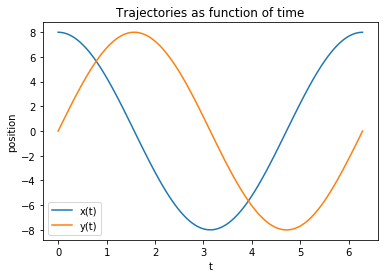

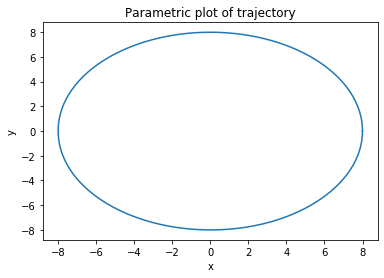

In [6]:
#In this example, we let the force be a central forcee, V = 0.5*k*(x^2+y^2), with k=1 - as in problem 6.3
#The mass of the particle is taken to be m = 1
def force_fct(t, x, y, vx, vy):
    return [-x, -y, vx, vy]

sol, t = solve_eom(0, 2*np.pi, 8, 0, 0, 8, force_fct)

plot_trajectory(sol, t)
#plot_velocities(sol, t)
plot_xy_plane(sol, t)
plt.show()

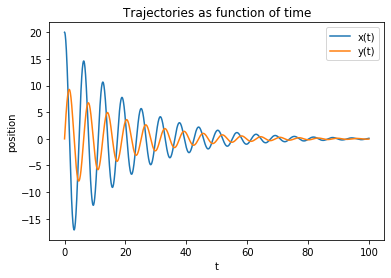

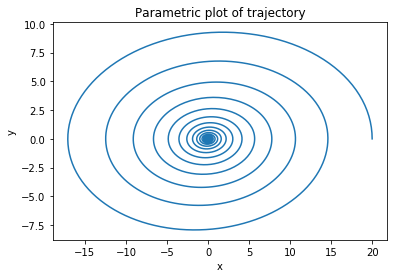

In [5]:
#In this example, we have a damped harmonic oscillator
def force_fct(t, x, y, vx, vy):
    r = np.sqrt(x*x+y*y)
    return [-x-0.1*vx, -y-0.1*vy, vx, vy]

sol, t = solve_eom(0, 100, 20, 0, 0, 10, force_fct)

plot_trajectory(sol, t)
#plot_velocities(sol, t)
plot_xy_plane(sol, t)
plt.show()

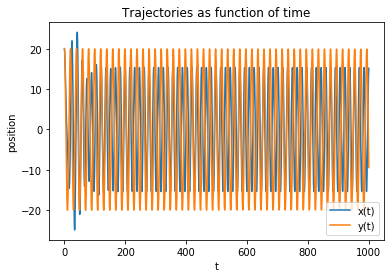

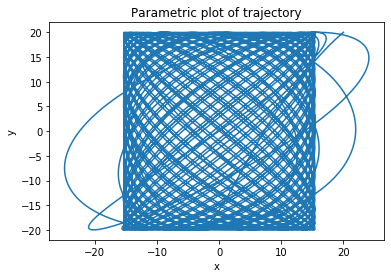

In [6]:
#In this example, we have a damped harmonic oscillator with an external force
def force_fct(t, x, y, vx, vy):
    r = np.sqrt(x*x+y*y)
    w0 = np.sqrt(0.1)
    eta = 0.1
    return [-w0**2*x-2.0*eta*w0*vx+np.sin(0.4*t), -0.1*y, vx, vy]

sol, t = solve_eom(0, 1000, 20, 20, 0, 0, force_fct)

plot_trajectory(sol, t)
#plot_velocities(sol, t)
plot_xy_plane(sol, t)
plt.show()

In [1]:
#In this example, we have a pendulum on a train
#The mass of the particle is taken to be
M = 1.0
m = 1.0
L = 1.0
K = 1.0
g = 10.0
x0 = 1.0

def force_fct(t, x, y, vx, vy):
    fxt = (vx*L-vy*np.cos(y))/(L*((M+m*np.sin(y)**2)))
    fyt = vy/(m*L**2)-(vx*L-vy*np.cos(y))*np.cos(x)/(L**2*(M+m*np.sin(y)**2))
    return [-K*(x-x0), -m*L*vy*vx*np.sin(y)-m*g*L*np.sin(y), fxt, fyt]

def coord_transform(t, x, y):
    xt = x
    xp = xt+L*np.sin(y)
    yp = -L*np.cos(y)
    return [xt, xp, yp]

sol, t = solve_eom(0, 15, 8, 0, 0, 0, force_fct)
xt, xp, yp = coord_transform(t, sol.sol(t)[2].T, sol.sol(t)[3].T)

plot_trajectory(sol, t)
#plot_velocities(sol, t)
plot_xy_plane(sol, t)
plt.figure()
plt.plot(t, yp)
plt.show()

NameError: name 'solve_eom' is not defined

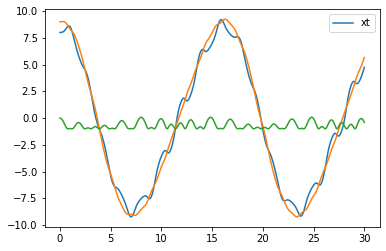

[]

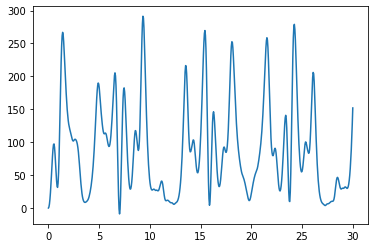

In [32]:
#In this example, we have a pendulum on a train
#The mass of the particle is taken to be
%matplotlib inline
M = 1.0
m = 1.0
L = 1.0
K = 1.0
g = 10.0
x0 = 0.0

def force_fct(t, xt, theta, dxt, dtheta):
    s = np.sin(theta)
    c = np.cos(theta)
    ddx = (m*L*dtheta**2*s+g*s-K*(xt-x0))/(M+m*(1.0-np.cos(theta)))
    ddtheta = (K*(xt-x0)-m*L*dtheta*s*c-(M+m)*g*s)/(L*(M+m*s**2))
    return [ddx, ddtheta, dxt, dtheta]

def coord_transform(t, xt, theta):
    xp = xt+L*np.sin(theta)
    yp = -L*np.cos(theta)
    return [xt, xp, yp]

def energy_fct(xt, theta, dxt, dtheta):
    K = 0.5*M*dxt**2+0.5*m*(dxt**2+(L*dtheta)**2+2*L*dtheta*dxt*np.cos(theta))
    V = -m*g*L*np.cos(theta)+0.5*K*(xt-x0)**2
    return K+V

sol, t = solve_eom(0, 30, 8, np.pi/2, 0, 0, force_fct)
dxt = sol.sol(t)[0].T
dtheta = sol.sol(t)[1].T
xt = sol.sol(t)[2].T
theta = sol.sol(t)[3].T
xt, xp, yp = coord_transform(t, xt, theta)

#plot_trajectory(sol, t)
#plot_velocities(sol, t)
#plot_xy_plane(sol, t)
plt.figure()
plt.plot(t, xt, label='xt')
plt.plot(t, xp)
plt.plot(t, yp)
plt.legend()
plt.show()
plt.plot(t, energy_fct(xt, theta, dxt, dtheta))
plt.plot()

In [24]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import display, clear_output
%matplotlib tk

fig, ax = plt.subplots()
xmin = np.min(xp)-0.5
xmax = np.max(xp)+0.5
ymin = np.min(yp)-0.5
ymax = np.max(yp)+0.5

def animate(i):
    plt.cla()
    ax.set_xlim( xmin, xmax)
    ax.set_ylim( ymin, ymax)
    ax.plot([0, xt[i], xt[i]], [0, yp[i], yp[i]], lw=2, c='k')

for i in range(0, len(t), 15):
    animate(i)
    plt.pause(0.01)
    #clear_output(wait=True)
    #display(fig)
    
plt.show()
;

''

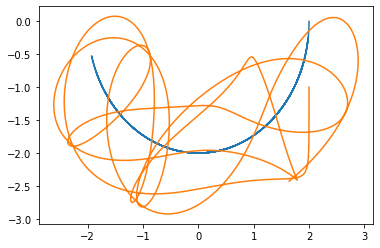

In [79]:
#In this example, we have a double pendulum
#The mass of the particle is taken to be

m1, m2 = 2.0, 1.0
l1, l2 = 2.0, 1.0
g = 10.0

def force_fct(t, theta1, theta2, dtheta1, dtheta2):
    s1 = np.sin(theta1)
    s2 = np.sin(theta2)
    cd = np.cos(theta1-theta2)
    sd = np.sin(theta1-theta2)
    ddtheta1 = (m2*g*s2*cd-m2*l1*sd*cd*dtheta1**2-g*(m1+m2)*s1-m2*l2*dtheta2**2*sd)/(l1*(m1+m2*sd**2))
    ddtheta2 = (m2*l2*dtheta2**2*sd*cd+(m1+m2)*(s1*g*cd+l1*sd*dtheta1**2-g*s2))/(l2*(m1+m2*sd**2))
    return [ddtheta1, ddtheta2, dtheta1, dtheta2]

def energy_fct(theta1, theta2, dtheta1, dtheta2):
    K = m1*0.5*(l1*dtheta1)**2+m2*0.5*((l1*dtheta1)**2+(l2*dtheta2)**2+2.0*l1*l2*dtheta1*dtheta2*np.cos(theta1-theta2))
    V = -(m1+m2)*g*l1*np.cos(theta1) - m2*g*l2*np.cos(theta2)
    return K+V

def coord_transform(t, theta1, theta2):
    x1 = l1*np.sin(theta1)
    y1 = -l1*np.cos(theta1)
    x2 = x1 + l2*np.sin(theta2)
    y2 = y1 - l2*np.cos(theta2)
    return [x1, y1, x2, y2]

sol, t = solve_eom(0, 10, np.pi*0.5, 0, 0, 0, force_fct, n=2000, max_stp=1.0)
dtheta1 = sol.sol(t)[0].T
dtheta2 = sol.sol(t)[1].T
theta1 = sol.sol(t)[2].T
theta2 = sol.sol(t)[3].T
x1, y1, x2, y2 = coord_transform(t, theta1, theta2)

plt.figure()
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.show()
#plt.figure()
#plt.plot(t, energy_fct(theta1, theta2, dtheta1, dtheta2))
#plt.show()

In [85]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import display, clear_output
%matplotlib tk

fig, ax = plt.subplots()
xmin = np.min(x2)-0.5
xmax = np.max(x2)+0.5
ymin = np.min(y2)-0.5
ymax = np.max(y2)+0.5

def animate(i):
    plt.cla()
    ax.set_xlim( xmin, xmax)
    ax.set_ylim( ymin, ymax)
    ax.plot([0, x1[i], x2[i]], [0, y1[i], y2[i]], lw=2, c='k')

for i in range(0, len(t), 15):
    animate(i)
    plt.pause(0.01)
    #clear_output(wait=True)
    #display(fig)
    
plt.show()
;

''